<a href="https://colab.research.google.com/github/khchoi-physik/pbh_simulations/blob/main/fem_test_peaks_counts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1D

[-0.47667321 -0.80378962 -0.52126339  0.48013087  2.88558987 -1.59042012
 -1.21161905  1.67148737 -1.12550315]
(array([4, 7]),)


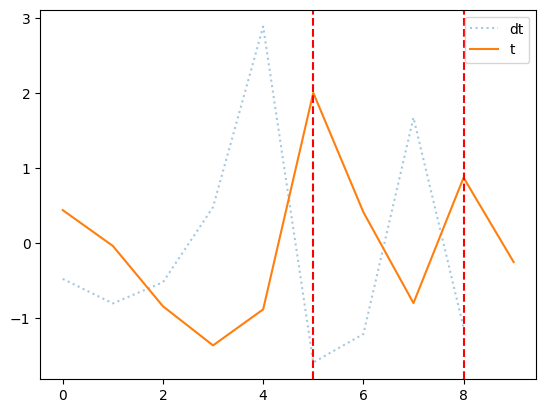

In [12]:
t= np.random.randn(10)
dt = t[1:] - t[:-1]
#print(t);
print(dt)
peaks = np.where(np.diff(np.sign(dt),axis=0)<0)
print(peaks)
peaks = peaks[0]

xrange = np.arange(len(t))
plt.plot(xrange[:-1],dt, label='dt', linestyle = ':', alpha=0.4)
plt.plot(xrange,t,label = 't')
for peak in peaks:
    plt.axvline(x=peak+1, color='r', linestyle='--')
    #plt.axvline(x=peak, color='b', linestyle=':')
plt.legend()

## 2D

In [14]:

mm=8
grf = np.random.randn(mm, mm)  # Replace with your actual grf array

grf= np.abs(grf)
cdx_grf = (grf[1: ,:] - grf[:-1, : ])

peaks = np.where(np.diff(np.sign(cdx_grf),axis=0)<0)
peaks_x = peaks[0] +1

peaks_pos_x = np.array( [ [peaks_x[n],peaks[1][n]] for n in range(len(peaks_x))] )

peaks_2d = []

for nn in range(len(peaks_pos_x)):

    x,y = peaks_pos_x[nn][0], peaks_pos_x[nn][1]

    if y > 0 and y < grf.shape[1]-1:
        # if  cdy_grf[x,y-1] > 0 and cdy_grf[x,y] < 0:
        #     peaks_2d.append( [x,y] )

        if  grf[x,y]- grf[x,y+1] > 0 and grf[x,y]- grf[x,y-1]  > 0:
            print('Find peaks at coor: ', x,y)
            peaks_2d.append( [x,y] )

Find peaks at coor:  1 2
Find peaks at coor:  1 6
Find peaks at coor:  2 5
Find peaks at coor:  3 4
Find peaks at coor:  3 6
Find peaks at coor:  4 5
Find peaks at coor:  5 2


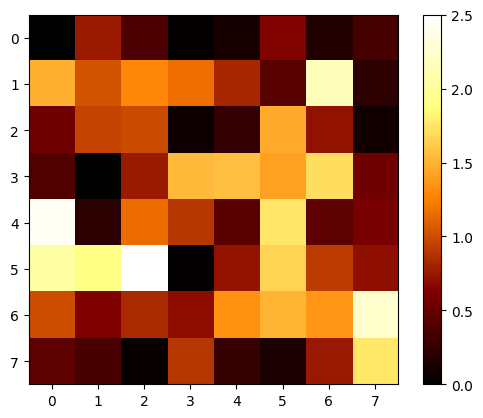

In [20]:
plt.imshow(grf, cmap='afmhot', interpolation='none', vmin=0, vmax=2.5)
plt.colorbar()

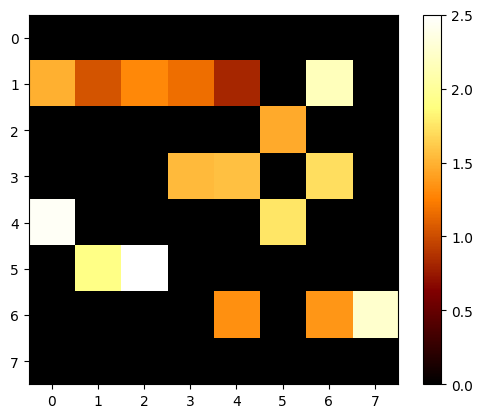

In [18]:
mask = np.zeros(grf.shape)

for (x,y) in peaks_pos_x:
    mask[x,y] =  grf[x,y]

plt.imshow(mask, cmap='afmhot', interpolation='none', vmin=0, vmax=2.5)
plt.colorbar()

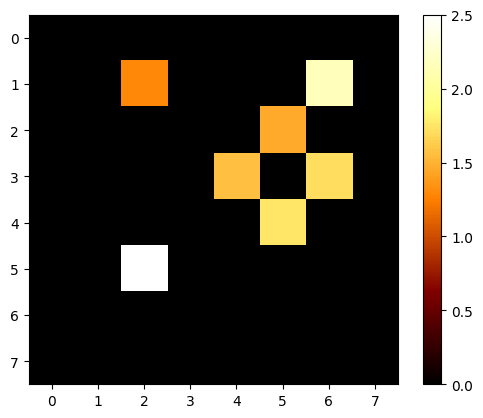

In [19]:
mask = np.zeros(grf.shape)

for (x,y) in peaks_2d:
    mask[x,y] =  grf[x,y]

plt.imshow(mask, cmap='afmhot', interpolation='none', vmin=0, vmax=2.5)
plt.colorbar()